In [132]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [133]:
# Shared functions

# Perform discrete convolution to calculate the probability distribution of the sum S
def convolve_distributions(distributions):
    result = distributions[0]
    for dist in distributions[1:]:
        result = np.convolve(result, dist)
    return result

# Simulate rolling the five dice and calculate the sum for each trial
def roll_dice(faces, num_simulations):
    rolls = [np.random.randint(1, face + 1, num_simulations) for face in faces]
    total_sum = np.sum(rolls, axis=0)
    return total_sum


# Function to calculate the probability of winning based on Monte Carlo trials
def monte_carlo_simulation(dice_faces, num_trials):
    sum_s = roll_dice(dice_faces, num_trials)
    winning_condition = (sum_s <= 10) | (sum_s >= 45)
    probability_of_winning = np.mean(winning_condition)
    return probability_of_winning



In [134]:
# Shared variables


# Define the number of faces on each die
# Tetrahedron (4), Cube (6), Octahedron (8), Dodecahedron (12), Icosahedron (20)
dice_faces = [4, 6, 8, 12, 20]

# Create the initial probability distribution for each die (uniform distribution)
distributions = [np.ones(face) / face for face in dice_faces]

# Calculate the probability distribution of the sum S
probability_S = convolve_distributions(distributions)

# The sum ranges from 5 to 50
possible_sums = np.arange(5, 51)


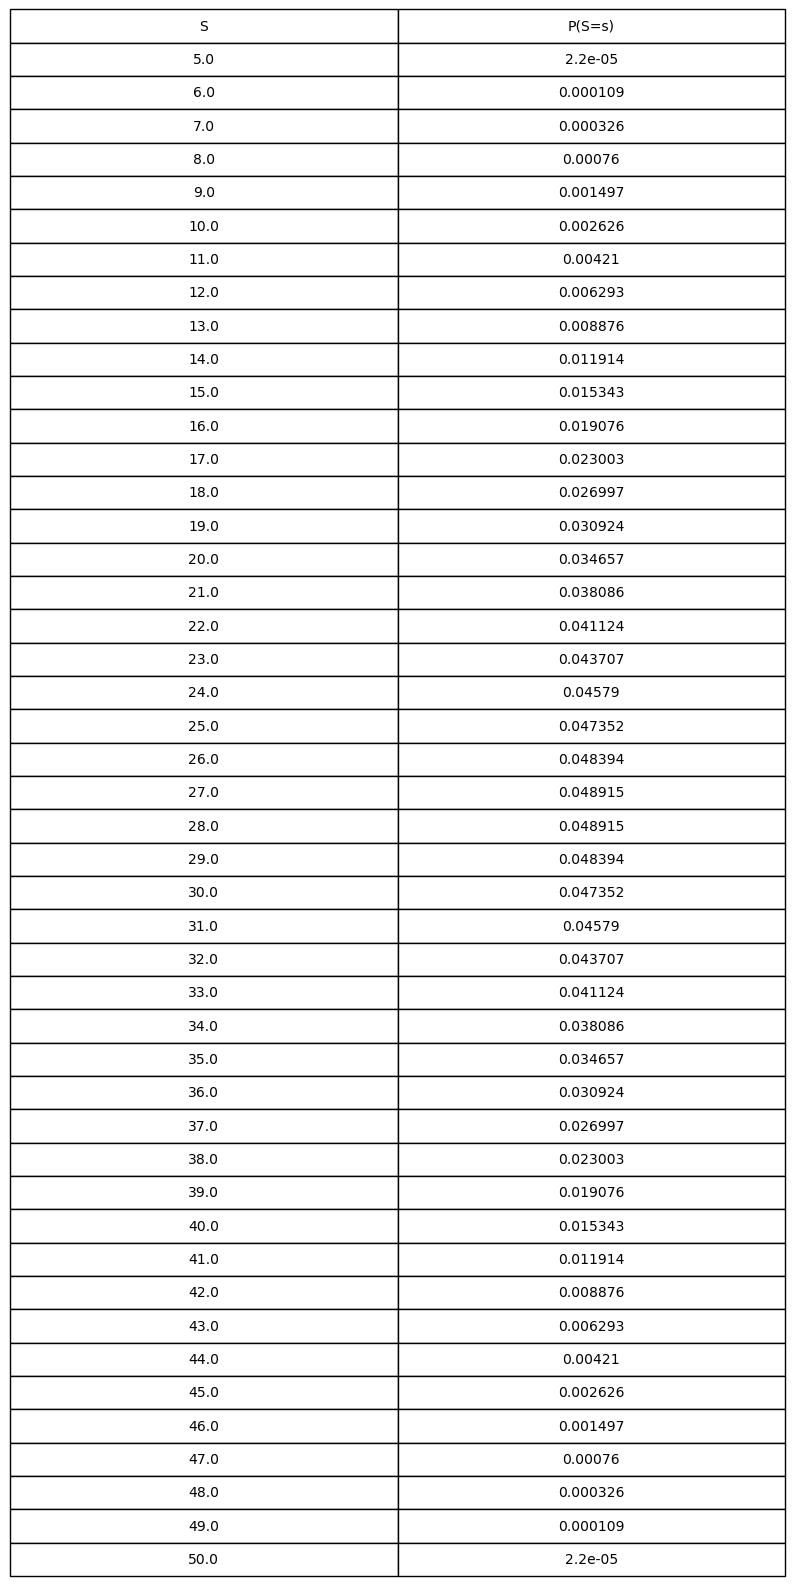

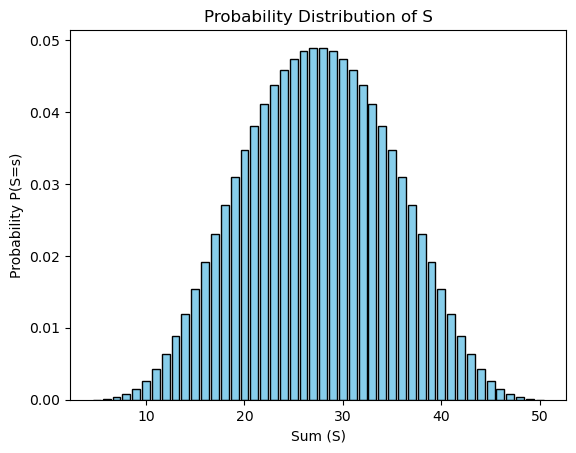

In [135]:
# Task 1


# Create a table for the probability distribution
probability_table = np.column_stack((possible_sums, probability_S))

# Create a DataFrame to display as a table
df = pd.DataFrame(probability_table, columns=['S', 'P(S=s)'])


df['P(S=s)'] = df['P(S=s)'].round(6) # Round probabilities for readability
df['S'] = df['S'].astype(int)  # Convert S to integer for better formatting

# Plot the figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_axis_off()  # Turn off the axis

# Create the table within the plot
table_data = df.values
table_columns = df.columns
table = ax.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center')
table.scale(1, 2) 
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.savefig('figures/probability_table.png', format='png', bbox_inches='tight')
plt.show()

# Plot the probability distribution in a more graphical way
plt.bar(possible_sums, probability_S, color='skyblue', edgecolor='black')
plt.xlabel('Sum (S)')
plt.ylabel('Probability P(S=s)')
plt.title('Probability Distribution of S')
plt.savefig('figures/probability_distribution.png', format='png', bbox_inches='tight')
plt.show()


In [136]:
# Task 2
    
"""
    In this task, we will estimate the probability of winning the game using discrete convolution.
    
    The probability of winning the game is defined as the probability of getting a sum less than or equal to 10 
    or greater than or equal to 45.
    We only need to sum the probabilities where S satisfies the winning condition to calculate the probability of winning.
    
"""

# Winning condition: S <= 10 or S >= 45
winning_indices = (possible_sums <= 10) | (possible_sums >= 45)

# Calculate the probability of winning by summing the probabilities where S satisfies the winning condition
probability_of_winning = np.sum(probability_S[winning_indices])

# Display the result
print(f"Probability of winning the game: {probability_of_winning:.6f}")

Probability of winning the game: 0.010677


In [137]:
# Task 3

# Set the number of simulations (Monte Carlo trials)
num_simulations = 1000

# Perform Monte Carlo simulation
sum_s = roll_dice(dice_faces, num_simulations)

# Calculate the probability of winning (S <= 10 or S >= 45)
winning_condition = (sum_s <= 10) | (sum_s >= 45)
probability_of_winning = np.mean(winning_condition)

# Display the result
print(f"Estimated probability of winning the game: {probability_of_winning:.6f}")

Estimated probability of winning the game: 0.011000


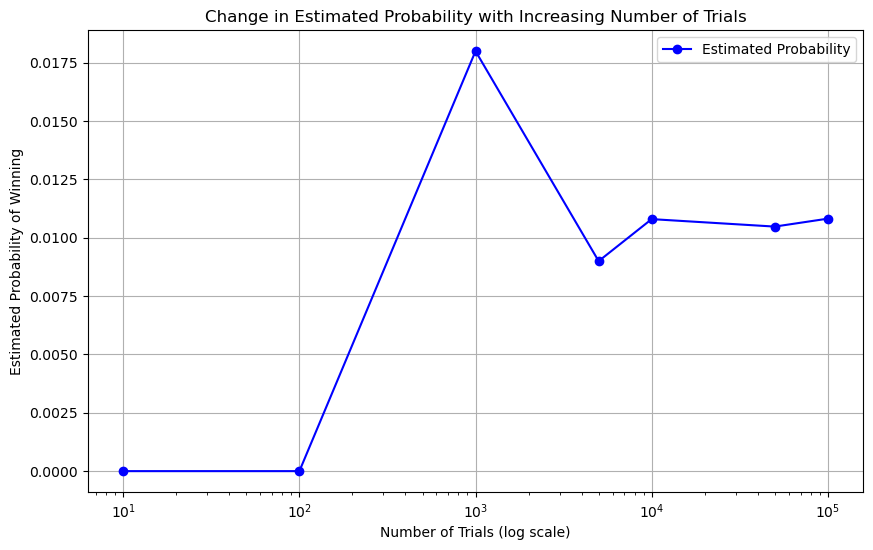

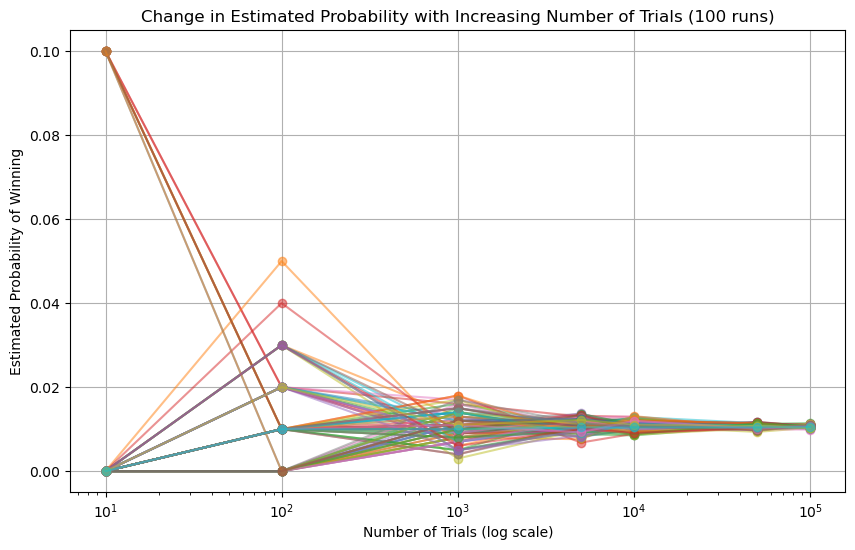

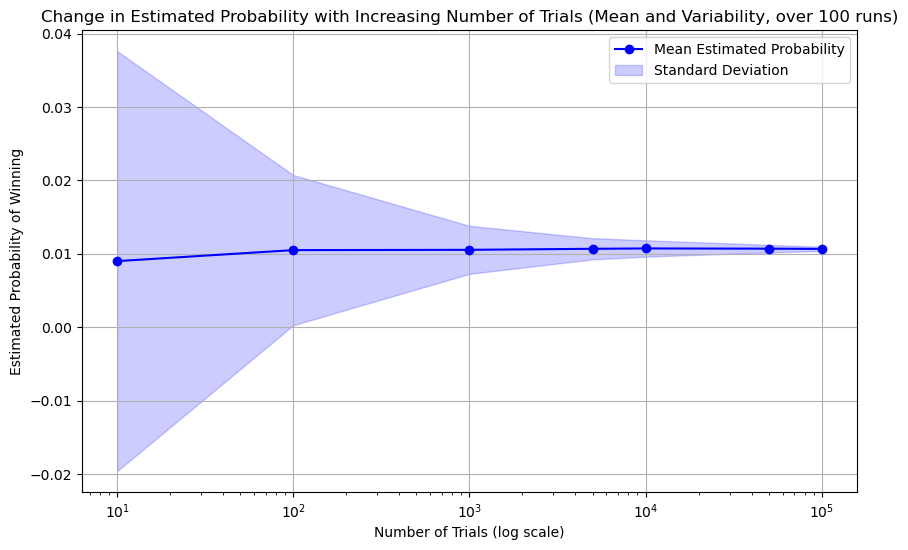

In [140]:
# Task 4 

"""

    In this task, we will perform Monte Carlo simulations to estimate the probability of winning the game
    for different numbers of trials. 
    We will vary the number of trials from 10 to 100,000 and observe how the estimated probability changes.
    The function 'monte_carlo_simulation' is defined above as a reusable function for this task. but it is basically 
    the same as the code in Task 3.

"""

trial_sizes = [10, 100, 1000, 5000, 10000, 50000, 100000]

# Store the estimated probabilities for each trial size
estimated_probabilities = []

# Perform Monte Carlo simulations for each number of trials and calculate probabilities
for trials in trial_sizes:
    estimated_probabilities.append(monte_carlo_simulation(dice_faces, trials))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(trial_sizes, estimated_probabilities, marker='o', linestyle='-', color='b', label='Estimated Probability')
plt.xscale('log')  # Logarithmic scale for better visualization
plt.xlabel('Number of Trials (log scale)')
plt.ylabel('Estimated Probability of Winning')
plt.title('Change in Estimated Probability with Increasing Number of Trials')
plt.grid(True)
plt.legend()
plt.savefig('figures/monte_carlo_probability_vs_trials.png', format='png')
plt.show()


# Comment out to Display the results printed out in the console
# for i, prob in zip(trial_sizes, estimated_probabilities):
#     print(f"Number of trials: {i}, Estimated Probability of Winning: {prob:.6f}")


# Mor in Task 4 - Multiple Runs


# Number of runs
num_runs = 100

# Trial sizes to test
trial_sizes = [10, 100, 1000, 5000, 10000, 50000, 100000]

# Store the estimated probabilities for each run
all_estimated_probabilities = np.zeros((num_runs, len(trial_sizes)))

plt.figure(figsize=(10, 6)) # Set up the plot size for multiple runs

# Perform Monte Carlo simulations for each run and store the results
for run in range(num_runs):
    estimated_probabilities = []
    
    # Perform Monte Carlo simulations for each number of trials
    for i, trials in enumerate(trial_sizes):
        probability = monte_carlo_simulation(dice_faces, trials)
        all_estimated_probabilities[run, i] = probability  # Store for later mean/std calculation
        estimated_probabilities.append(probability)
    
    # Plot each run's results with some transparency (alpha) to layer them
    plt.plot(trial_sizes, estimated_probabilities, marker='o', linestyle='-', alpha=0.5, label=f'Run {run + 1}')


# Configure and show the layered plot for multiple runs
plt.xscale('log')  # Logarithmic scale for better visualization
plt.xlabel('Number of Trials (log scale)')
plt.ylabel('Estimated Probability of Winning')
plt.title(f'Change in Estimated Probability with Increasing Number of Trials ({num_runs} runs)')
plt.grid(True)
plt.savefig('figures/monte_carlo_probability_vs_trials_multiple_runs.png', format='png')
plt.show()

# Calculate mean and standard deviation across runs using the stored results
mean_probabilities = np.mean(all_estimated_probabilities, axis=0)
std_probabilities = np.std(all_estimated_probabilities, axis=0)

# Plot the mean probability with shaded area for standard deviation
plt.figure(figsize=(10, 6))
plt.plot(trial_sizes, mean_probabilities, marker='o', linestyle='-', color='b', label='Mean Estimated Probability')
plt.fill_between(trial_sizes, mean_probabilities - std_probabilities, mean_probabilities + std_probabilities, 
                 color='b', alpha=0.2, label='Standard Deviation')

# Plot settings for the mean and standard deviation plot
plt.xscale('log')  # Logarithmic scale for better visualization
plt.xlabel('Number of Trials (log scale)')
plt.ylabel('Estimated Probability of Winning')
plt.title(f'Change in Estimated Probability with Increasing Number of Trials (Mean and Variability, over {num_runs} runs)')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('figures/monte_carlo_probability_vs_trials_mean_std.png', format='png')
plt.show()

# Comment out the loops below to see the result printed out in the console
# for run in range(num_runs):
#     print(f"--- Results for Run {run + 1} ---")
#     for i, prob in zip(trial_sizes, all_estimated_probabilities[run]):
#         print(f"Number of trials: {i}, Estimated Probability of Winning: {prob:.6f}")